In [1]:
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np

from numpy import genfromtxt
from numpy import linalg as LA

import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# read the pivot tables data

df_o = pd.read_csv('pivot_o.csv', skipinitialspace=True, sep=';', engine='python')
df_f = pd.read_csv('pivot_f.csv', skipinitialspace=True, sep=';', engine='python')
df_g = pd.read_csv('pivot_g.csv', skipinitialspace=True, sep=';', engine='python')

In [13]:
df_o

,Unnamed: 0,o__,o__Acidimicrobiales,o__Acidobacteriales,o__Actinomycetales,o__Aeromonadales,o__Alteromonadales,o__Anaeroplasmatales,o__Aquificales,o__Bacillales,...,o__SBla14,o__Sphaerochaetales,o__Spirobacillales,o__Sva0725,o__Thermoanaerobacterales,o__Thermogemmatisporales,o__Thiohalorhabdales,o__YLA114,o__Z20,o__mle1-48
0,10317.000052344,0.0,0.0,0.0,0.001334,0.0,0.0,0.0,0.0,0.000140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10317.000052366,0.0,0.0,0.0,0.007542,0.0,0.0,0.0,0.0,0.001019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10317.000052369,0.0,0.0,0.0,0.000838,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10317.00005237,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10317.000052372,0.0,0.0,0.0,0.000693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14093,MSM5LLIO,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14094,MSM5LLIQ,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14095,MSM5ZOJY,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14096,MSM633FF,0.0,0.0,0.0,0.000930,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# drop the names of the samples

data_o = df_o.drop('Unnamed: 0', axis = 1)
data_f = df_f.drop('Unnamed: 0', axis = 1)
data_g = df_g.drop('Unnamed: 0', axis = 1)

In [15]:
data_o.shape

(14098, 179)

In [26]:
# evaluate PCA - this was already calculated and stored to proj*.csv files, but we need it to calculate the inverse

pca = PCA(n_components=20)
pca.fit(data_o)

eigenvectors_o = pca.components_
eigenvalues_o = pca.explained_variance_

In [27]:
# perform PCA transformation

pca_o = pca.fit_transform(data_o)

In [22]:
# paths with the isomap reconstructed data

paths = [
    "./proj_o.csv"
]

for num in range(1,11) :
    name = "isomap_o_dim" + str(num) + "_reconstructed_pca.csv"
    paths.append(name)

In [23]:
paths

['./proj_o.csv',
 'isomap_o_dim1_reconstructed_pca.csv',
 'isomap_o_dim2_reconstructed_pca.csv',
 'isomap_o_dim3_reconstructed_pca.csv',
 'isomap_o_dim4_reconstructed_pca.csv',
 'isomap_o_dim5_reconstructed_pca.csv',
 'isomap_o_dim6_reconstructed_pca.csv',
 'isomap_o_dim7_reconstructed_pca.csv',
 'isomap_o_dim8_reconstructed_pca.csv',
 'isomap_o_dim9_reconstructed_pca.csv',
 'isomap_o_dim10_reconstructed_pca.csv']

In [118]:
# read the isomap reconstructed data

datasets = [np.genfromtxt(path, delimiter=';') for path in paths]

In [10]:
PCA_o = datasets[0]

In [11]:
print(PCA_o.shape)

(14098, 20)


# Repeat the fragment below for all reconstructed isomap datasets

In [124]:
# perform the inverse. Change the index at every iteration

inverse = pca.inverse_transform(datasets[10])

In [125]:
inverse.shape

(14098, 179)

In [51]:
#df_o.values[:, 1:] - inverse

array([[-0.0012157956155474242, -5.373073047876079e-05,
        -1.2848433843262521e-05, ..., 1.270923604714639e-09,
        -2.923089985940709e-06, -1.6884755471511273e-09],
       [-0.0008058266870344886, -2.73300228976861e-05,
        -8.080070591804287e-06, ..., -6.93696996512235e-08,
        -3.161515029810563e-06, -5.294452223463514e-08],
       [-0.000505100145672072, -2.060950800644633e-05,
        -4.348056783218412e-06, ..., -9.817522270403682e-08,
        -4.249071401243223e-06, -2.1182912090996773e-08],
       ...,
       [5.727805201799518e-05, -2.7029919642077004e-06,
        5.000586286392986e-06, ..., -1.526487362830568e-07,
        -2.1655779976421486e-06, -1.5434453311618068e-08],
       [-5.9280539075324515e-05, -6.25375539636377e-07,
        -2.906845545239669e-06, ..., -3.9228308011850737e-08,
        -2.5307939592509816e-06, -2.0076708108105135e-08],
       [-0.0009978241819689196, -3.7189148481551353e-05,
        -8.666393378450602e-06, ..., -1.4046820471446682e-

In [126]:
# calculate the mean average error as the differences divided by the sample values (see the report)

diff = df_o.values[:, 1:] - inverse
abs_diff = np.apply_along_axis(np.linalg.norm, 1, diff, ord=2)
abs_true = np.apply_along_axis(np.linalg.norm, 1, df_o.values[:, 1:], ord=2)
#max_ = max(abs_true)
#min_ = min(abs_true)
mae = np.mean(abs_diff/abs_true)

In [69]:
#errors = []

In [127]:
# add new error to the list

errors.append(mae)

In [128]:
errors

[0.30523027442050654,
 0.06599741346040792,
 0.05412119892860435,
 0.04481798578445261,
 0.04225166166322751,
 0.04057870391357813,
 0.03970612003168245,
 0.03883152120483207,
 0.03823595740417444,
 0.038244575579438764]

# Fragment ended

In [129]:
x = np.linspace(1, 10, 10,endpoint=True)

In [130]:
y = np.take(errors, range(0,10))

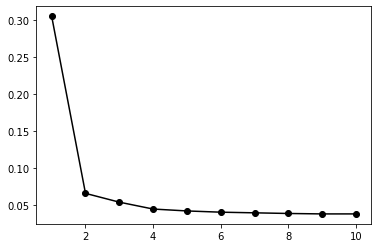

In [131]:
# plotting the errors

plt.plot(x, y, '-ok')